# Assignment 3.3

# Image Caption Retrieval Model

### 1. Data preprocessing

We will use Microsoft COCO (Common Objects in Context) data set to train our "Image Caption Retrieval Model". This data set consists of pretrained 10-crop VGG19 features (Neural codes) and its corresponding text caption. 


In [8]:
from __future__ import print_function

import os
import sys
import numpy as np
import pandas as pd
from collections import OrderedDict

DATA_PATH = 'data'
IMAGE_DATA= 'val2014'
EMBEDDING_PATH = 'embeddings'
MODEL_PATH = 'models'

You will need to create above directories and locate data set provided in directory 'data'

#### Reading pairs of image (VGG19 features) - caption data

In [19]:
# DO NOT CHANGE BELOW CODE

import collections

np_train_data = np.load(os.path.join(DATA_PATH,'train_data.npy'))
np_val_data = np.load(os.path.join(DATA_PATH,'val_data.npy'))

train_data = collections.OrderedDict()
for i in range(len(np_train_data.item())):
    cap =  np_train_data.item()['caps']
    img =  np_train_data.item()['ims']
    train_data['caps'] = cap
    train_data['ims'] = img
    
val_data = collections.OrderedDict()
for i in range(len(np_val_data.item())):
    cap =  np_val_data.item()['caps']
    img =  np_val_data.item()['ims']
    val_data['caps'] = cap
    val_data['ims'] = img

In [ ]:
################### BEGIN DEBUGGING (UNIMPORTANT PART, YOU CAN SKIP) DELETE THIS LATER #########################################

In [108]:
train_data['ims'].shape

(10000, 4096)

In [176]:
val_data['caps']

[b'a child holding a flowered umbrella and petting a yak',
 b'a young man holding an umbrella next to a herd of cattle',
 b'a young boy barefoot holding an umbrella touching the horn of a cow',
 b'a young boy with an umbrella who is touching the horn of a cow',
 b'a boy holding an umbrella while standing next to livestock',
 b'a narrow kitchen filled with appliances and cooking utensils',
 b'a galley kitchen with cabinets and appliances on both sides',
 b'a hallway leading into a white kitchen with appliances',
 b'doorway view of a kitchen with a sink stove refrigerator and pantry',
 b'the pantry door of the small kitchen is closed',
 b'a little girl holding a kitten next to a blue fence',
 b'girl in a tank top holding a kitten in her back yard',
 b'a young girl is holding a small cat',
 b'girl with a yellow shirt holding a small cat',
 b'a girl smiles as she holds a kitty cat',
 b'a toilet sitting in a bathroom next to a sink',
 b'a toilet in a bathroom with green faded paint',
 b'a b

In [242]:
val_image_ids[100]

2712

In [181]:
val_data['ims'][0].shape

(4096,)

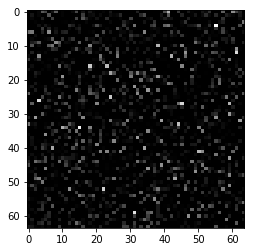

In [188]:
show_img(val_data['ims'][0])

In [74]:
np.asarray(np_train_data.item()['ims']).shape


(5000, 4096)

In [91]:
np.asarray(np_val_data.item()['caps']).shape

(25000,)

In [138]:
np_train_data.item()['caps'][0]


b'a woman wearing a net on her head cutting a cake'

In [81]:
# example of caption
np_train_data.item()['caps'][0]

b'a woman wearing a net on her head cutting a cake'

In [142]:
# example of pre-computed VGG19 features
train_data['caps'][0]

b'a woman wearing a net on her head cutting a cake'

In [4]:
coco_instances_val.keys()

dict_keys(['info', 'images', 'licenses', 'annotations', 'categories'])

In [5]:
coco_instances_val['images']

[{'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg',
  'date_captured': '2013-11-14 11:18:45',
  'file_name': 'COCO_val2014_000000391895.jpg',
  'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
  'height': 360,
  'id': 391895,
  'license': 3,
  'width': 640},
 {'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000522418.jpg',
  'date_captured': '2013-11-14 11:38:44',
  'file_name': 'COCO_val2014_000000522418.jpg',
  'flickr_url': 'http://farm1.staticflickr.com/1/127244861_ab0c0381e7_z.jpg',
  'height': 480,
  'id': 522418,
  'license': 4,
  'width': 640},
 {'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000184613.jpg',
  'date_captured': '2013-11-14 12:36:29',
  'file_name': 'COCO_val2014_000000184613.jpg',
  'flickr_url': 'http://farm3.staticflickr.com/2169/2118578392_1193aa04a0_z.jpg',
  'height': 336,
  'id': 184613,
  'license': 3,
  'width': 500},
 {'coco_url': 'http://images.cocoda

In [7]:
coco_caption_val.keys()

dict_keys(['info', 'images', 'licenses', 'annotations'])

In [8]:
len(coco_caption_val['annotations'])

202654

In [9]:
coco_caption_val['annotations'][0]

{'caption': 'A bicycle replica with a clock as the front wheel.',
 'id': 37,
 'image_id': 203564}

In [12]:
#traindata_ims= 10k of 4096
#traindata_caps= 50k of ??? 40-50?
#valdata_ims= 5k of 4096
#valdata_cas= 25k of ???

len(words_indices)

11473

In [29]:
x_caption

array([[  2,  21, 162, ...,   0,   0,   0],
       [140, 871,  93, ...,   0,   0,   0],
       [ 79,  18,   7, ...,   0,   0,   0],
       ...,
       [  2,  10,  25, ...,   0,   0,   0],
       [  2,  20,  42, ...,   0,   0,   0],
       [  2, 374,   9, ...,   0,   0,   0]])

In [30]:
train_caps

['a woman wearing a net on her head cutting a cake',
 'a woman cutting a large white sheet cake',
 'a woman wearing a hair net cutting a large sheet cake',
 'there is a woman that is cutting a white cake',
 'a woman marking a cake with the back of a chefs knife',
 'a young boy standing in front of a computer keyboard',
 'a little boy wearing headphones and looking at a computer monitor',
 'he is listening intently to the computer at school',
 'a young boy stares up at the computer monitor',
 'a young kid with head phones on using a computer',
 'a boy wearing headphones using one computer in a long row of computers',
 'a little boy with earphones on listening to something',
 'a group of people sitting at desk using computers',
 'children sitting at computer stations on a long table',
 'a small child wearing headphones plays on the computer',
 'a man is in a kitchen making pizzas',
 'man in apron standing on front of oven with pans and bakeware',
 'a baker is working in the kitchen rolli

In [ ]:
################### END DEBUGGING  ###################################################################################

#### Reading caption and information about its corresponding raw images from Microsoft COCO website

In [20]:
# DO NOT CHANGE BELOW CODE
# use them for your own additional preprocessing step
# to map precomputed features and location of raw images 

import json

with open(os.path.join(DATA_PATH,'instances_val2014.json')) as json_file:
    coco_instances_val = json.load(json_file)
    
with open(os.path.join(DATA_PATH,'captions_val2014.json')) as json_file:
    coco_caption_val = json.load(json_file)

#### Additional preprocessing

In [343]:
# create your own function to map pairs of precomputed features and filepath of raw images
# this will be used later for visualization part
# simple approach: based on matched text caption (see json file)

# YOUR CODE HERE 
print(coco_caption_val.keys())
print(len(coco_instances_val['images']))
print(coco_caption_val['images'][0])
print(coco_caption_val['annotations'][0])
print('========================================')
for i in coco_caption_val['annotations']:
    if(i['image_id']==391895):
        print(i)
#print(coco_caption_val[0])

#todo: mapping





dict_keys(['info', 'images', 'licenses', 'annotations'])
40504
{'license': 3, 'file_name': 'COCO_val2014_000000391895.jpg', 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg', 'height': 360, 'width': 640, 'date_captured': '2013-11-14 11:18:45', 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg', 'id': 391895}
{'image_id': 203564, 'id': 37, 'caption': 'A bicycle replica with a clock as the front wheel.'}
{'image_id': 391895, 'id': 770337, 'caption': 'A man with a red helmet on a small moped on a dirt road. '}
{'image_id': 391895, 'id': 771687, 'caption': 'Man riding a motor bike on a dirt road on the countryside.'}
{'image_id': 391895, 'id': 772707, 'caption': 'A man riding on the back of a motorcycle.'}
{'image_id': 391895, 'id': 776154, 'caption': 'A dirt path with a young person on a motor bike rests to the foreground of a verdant area with a bridge and a background of cloud-wreathed mountains. '}
{'image_id': 391895, 'id': 7

#### Build vocabulary index 

In [21]:
# DO NOT CHANGE BELOW CODE

def build_dictionary(text):

    wordcount = OrderedDict()
    for cc in text:
        words = cc.split()
        for w in words:
            if w not in wordcount:
                wordcount[w] = 0
            wordcount[w] += 1
    words = list(wordcount.keys())
    freqs = list(wordcount.values())
    sorted_idx = np.argsort(freqs)[::-1]
    

    worddict = OrderedDict()
    worddict['<pad>'] = 0
    worddict['<unk>'] = 1
    for idx, sidx in enumerate(sorted_idx):
        worddict[words[sidx]] = idx+2  # 0: <pad>, 1: <unk>
    

    return worddict

# use the resulting vocabulary index as your look up dictionary
# to transform raw text into integer sequences

all_captions = []
all_captions = train_data['caps'] + val_data['caps']

# decode bytes to string format
caps = []
for w in all_captions:
    caps.append(w.decode())
    
words_indices = build_dictionary(caps)
print ('Dictionary size: ' + str(len(words_indices)))
indices_words = dict((v,k) for (k,v) in words_indices.items())

##add custom
#words_indices = dict((k,v) for (k,v) in words_indices.items())

Dictionary size: 11473


In [111]:
#traindata_ims= 10k of 4096
#traindata_caps= 50k of ??? 40-50?
#valdata_ims= 5k of 4096
#valdata_cas= 25k of ???

len(words_indices)

11473

In [1]:
from keras.layers import Dense, Embedding,Input,LSTM,GRU,Lambda,add,dot,subtract, maximum
from keras.models import Model
import keras.backend as K

c:\users\illia\appdata\local\conda\conda\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### 2. Image - Caption Retrieval Model

### Image model

In [12]:
# YOUR CODE HERE 
from keras.layers import Dense, Embedding,Dot,Input,LSTM,GRU,Add, Subtract, concatenate

#image network
img_input = Input(shape=(4096,),name='IMG_input')
condense_img = Dense(1024,name='Dense_IMG')(img_input)



### Caption model

In [13]:
import gensim
from gensim.models import KeyedVectors
path = ".."

#convert GloVe into word2vec format
#gensim.scripts.glove2word2vec.get_glove_info(path)
#gensim.scripts.glove2word2vec.glove2word2vec(path, "glove_converted.txt")

glove = KeyedVectors.load_word2vec_format("../glove_converted.txt", binary=False)



c:\users\illia\appdata\local\conda\conda\envs\tensorflow-gpu\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [14]:
# YOUR CODE HERE

voc_size = len(indices_words)#11k ish
cap_size = 50

caption_input = Input(shape=(cap_size,),name='CAP_input')
noise_input = Input(shape=(cap_size,),name='Noise_input')

# layer for computing dot product between tensors
vocab_dim = 300 # dimensionality of your word vectors
n_symbols = voc_size + 1 # adding 1 to account for 0th index (for masking)
embedding_weights = np.zeros((n_symbols, vocab_dim))
for word,index in words_indices.items():
    try:
        embedding_weights[index, :] = glove[word]
    except KeyError:
        embedding_weights[index, :] = np.zeros(vocab_dim)
# define inputs here
    embedding_layer = Embedding(output_dim=vocab_dim, input_dim=n_symbols, trainable=False)
embedding_layer.build((None,)) # if you don't do this, the next step won't work
embedding_layer.set_weights([embedding_weights])


recurrent_layer = LSTM(1024,name='recurrent_layer')


#inputs into shared layers
embed_caption = embedding_layer(caption_input)
embed_noise = embedding_layer(noise_input)

recurrent_noise = recurrent_layer(embed_noise)
recurrent_caption = recurrent_layer(embed_caption)

### Join model

In [15]:
# YOUR CODE HERE



#noise and real score
cap_image = dot([condense_img,recurrent_caption],1,normalize=True, name='DotProd_postive_score')
noise_image = dot([condense_img,recurrent_noise],1,normalize=True, name='DotProd_negative_score')
conc = concatenate([cap_image,noise_image],axis=-1)



### Main model for training stage

In [16]:
# YOUR CODE HERE

# define your model input and output
print ("loading the training model")
training_model = Model(inputs=[img_input,caption_input,noise_input],outputs=conc)
training_model.summary()







loading the training model
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
CAP_input (InputLayer)          (None, 50)           0                                            
__________________________________________________________________________________________________
Noise_input (InputLayer)        (None, 50)           0                                            
__________________________________________________________________________________________________
IMG_input (InputLayer)          (None, 4096)         0                                            
__________________________________________________________________________________________________
embedding_11473 (Embedding)     (None, 50, 300)      3442200     CAP_input[0][0]                  
                                                                 Noise_input[0][0]

### Retrieval model

In [17]:
# YOUR CODE HERE

# define your model input and output

print ("loading sub-models for retrieving Neural codes")

caption_model = Model(inputs=caption_input, outputs=recurrent_caption)
caption_model.summary()


image_model = Model(inputs=img_input, outputs=condense_img)
image_model.summary()

loading sub-models for retrieving Neural codes
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CAP_input (InputLayer)       (None, 50)                0         
_________________________________________________________________
embedding_11473 (Embedding)  (None, 50, 300)           3442200   
_________________________________________________________________
recurrent_layer (LSTM)       (None, 1024)              5427200   
Total params: 8,869,400
Trainable params: 5,427,200
Non-trainable params: 3,442,200
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
IMG_input (InputLayer)       (None, 4096)              0         
_________________________________________________________________
Dense_IMG (Dense)            (None, 1024)              4195328   
Total param

### Loss function

We define our loss function as a loss for maximizing the margin between a positive and
negative example.  If we call $p_i$ the score of the positive pair of the $i$-th example, and $n_i$ the score of the negative pair of that example, the loss is:

\begin{equation*}
loss = \sum_i{max(0, 1 -p_i + n_i)}
\end{equation*}

In [28]:
from keras import backend as K


def max_margin_loss(y_true, y_pred):
    print(y_pred.shape)
    return K.sum(K.maximum(0.0, 1.0 - y_pred[:,0] + y_pred[:,1]))

   

#### Accuracy metric for max-margin loss
How many times did the positive pair effectively get a higher value than the negative pair?

In [29]:
# YOUR CODE HERE

def accuracy(y_true, y_pred):
    # YOUR CODE HERE
    #accuracy_ = K.mean(y_pred[0]>y_pred[1])#(cnt*1.0)/len(y_pred[0])#K.mean(y_pred>0)#K.minimum(K.minimum(y_pred,0),1)#K.mean(K.cast(((y_pred-1)*-1)>=0,dtype='int32')) ##(cnt*1.0)/len(y_pred)#K.mean(K.great_equal(y_true, K.round(y_pred)), axis=-1)
    accuracy_ = K.mean(y_pred[:,0]>y_pred[:,1])
    return accuracy_


### Compile model

In [20]:
# DO NOT CHANGE BELOW CODE
print ("compiling the training model")
training_model.compile(optimizer='adam', loss=max_margin_loss, metrics=[accuracy])
image_model.compile(optimizer='adam', loss=max_margin_loss, metrics=[accuracy])
caption_model.compile(optimizer='adam', loss=max_margin_loss, metrics=[accuracy])
#training_model.compile(optimizer='adam', loss=max_margin_loss)

compiling the training model
(?, 2)
(?, 1024)
(?, 1024)


### 3. Data preparation for training the model

* adjust the length of captions into fixed maximum length (50 words)
* sampling caption for each image, while shuffling the image data
* encode captions into integer format based on look-up vocabulary index

In [22]:
# sampling one caption per image
# return image_ids, caption_ids


#['caps']['ims'] 
# YOUR CODE HERE
    
def sampling_img_cap(data):
    datalen=len(data['ims'])
    image_ids = np.arange(datalen)
    np.random.shuffle(image_ids)
    caption_ids=[image_ids[x]*5+np.random.randint(0, 5) for x in range(datalen)]

    
    return image_ids, caption_ids

#train_image_ids, train_caption_ids = sampling_img_cap(train_data)

In [23]:
# transform raw text caption into integer sequences of fixed maximum length


def make_50(arr):
    return_arr=np.zeros(50,dtype=int)
    limit_id=min(50,len(arr))
    for i in range(limit_id):
        return_arr[i]+=arr[i]
    return return_arr
    
def prepare_caption(caption_ids, caption_data):
    
    # YOUR CODE HERE
    datalen=len(caption_ids)
    #[[float(y) for y in x] for x in l]
    zero=np.zeros(50)
    cap_transformed=[caption_data[caption_ids[x]] for x in range(datalen)]
    caption_seqs = [[words_indices[word] for word in sentence.split() ] for sentence in cap_transformed ]
    caption_seqs=np.asarray([make_50(i) for i in caption_seqs])
    
      
    return caption_seqs

#x_caption = prepare_caption(train_caption_ids, train_caps)

In [24]:
# DO NOT CHANGE BELOW CODE

train_caps = []
for cap in train_data['caps']:
    train_caps.append(cap.decode())

val_caps = []
for cap in val_data['caps']:
    val_caps.append(cap.decode())

In [25]:
# DO NOT CHANGE BELOW CODE

train_image_ids, train_caption_ids = sampling_img_cap(train_data)
val_image_ids, val_caption_ids = sampling_img_cap(val_data)

x_caption = prepare_caption(train_caption_ids, train_caps)
x_image = train_data['ims'][np.array(train_image_ids)]

x_val_caption = prepare_caption(val_caption_ids, val_caps)
x_val_image = val_data['ims'][np.array(val_image_ids)]

### 4. Create noise set for negative examples of image-fake caption and dummy output

Notice that we do not have real output with labels for training the model. Keras architecture expects labels, so we need to create dummy output -- which is numpy array of zeros. This dummy labels or output is never used since we compute loss function based on margin between positive examples (image-real caption) and negative examples (image-fake caption).

In [26]:
# YOUR CODE HERE


#tr_noise = [[abs(np.random.normal(np.mean(y),np.std(y),50))] for y in x_image]
#vl_noise = [[abs(np.random.normal(np.mean(y),np.std(y),50))] for y in x_val_image]

#train_noise = [x_image[i] + tr_noise[i] for i in range(len(x_image))]
#val_noise = [x_val_image[i] + vl_noise[i] for i in range(len(x_val_image))]

train_noise =np.copy(x_caption)#np.asarray([np.random.randint(0,50,size=50) for y in x_caption])
val_noise = np.copy(x_val_caption)#np.asarray([np.random.randint(0,50,size=50)for y in x_val_caption])

np.random.shuffle(train_noise)
np.random.shuffle(val_noise)    
y_train_labels = np.zeros(10000)#((len(x_image),50))
y_val_labels = np.zeros(5000)#((len(x_val_image),50))

### 5. Training model

In [28]:
# YOUR CODE HERE

X_train = [x_image,x_caption,train_noise]
Y_train = y_train_labels
X_valid = [x_val_image,x_val_caption,val_noise]
Y_valid = y_val_labels

In [48]:
training_model.fit(X_train,Y_train, validation_data=(X_valid, Y_valid), batch_size=100, epochs=20)

Train on 10000 samples, validate on 5000 samples
Epoch 1/20
10000/10000 [==============================] - 81s 8ms/step - loss: 1.9586 - accuracy: 0.5000 - val_loss: 2.2337 - val_accuracy: 0.3200
Epoch 2/20
10000/10000 [==============================] - 80s 8ms/step - loss: 1.9334 - accuracy: 0.5500 - val_loss: 2.0806 - val_accuracy: 0.4200
Epoch 3/20
10000/10000 [==============================] - 80s 8ms/step - loss: 1.9264 - accuracy: 0.5800 - val_loss: 2.0866 - val_accuracy: 0.4400
Epoch 4/20
10000/10000 [==============================] - 82s 8ms/step - loss: 1.9931 - accuracy: 0.5000 - val_loss: 2.0589 - val_accuracy: 0.4600
Epoch 5/20
10000/10000 [==============================] - 82s 8ms/step - loss: 2.1111 - accuracy: 0.4800 - val_loss: 1.9709 - val_accuracy: 0.5000
Epoch 6/20
10000/10000 [==============================] - 82s 8ms/step - loss: 1.9258 - accuracy: 0.5500 - val_loss: 1.9072 - val_accuracy: 0.6200
Epoch 7/20
10000/10000 [==============================] - 82s 8ms/ste

In [29]:
for i in range(20):
    np.random.shuffle(train_noise)
    np.random.shuffle(val_noise)
    X_train = [x_image,x_caption,train_noise]
    X_valid = [x_val_image,x_val_caption,val_noise]
    training_model.fit(X_train,Y_train, validation_data=(X_valid, Y_valid), batch_size=100, epochs=1)

Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 81s 8ms/step - loss: 88.9186 - accuracy: 0.6275 - val_loss: 72.0004 - val_accuracy: 0.7072
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 80s 8ms/step - loss: 59.8679 - accuracy: 0.7667 - val_loss: 55.7581 - val_accuracy: 0.7884
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 82s 8ms/step - loss: 49.6947 - accuracy: 0.8059 - val_loss: 47.8298 - val_accuracy: 0.8282
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 82s 8ms/step - loss: 46.5991 - accuracy: 0.8306 - val_loss: 46.8327 - val_accuracy: 0.8154
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 82s 8ms/step - loss: 44.3766 - accuracy: 0.8471 - val_loss: 43.3367 - val_accuracy: 0.8646
Train on 10000 

#### Storing 20 iter models and weight parameters

In [ ]:
# DO NOT CHANGE BELOW CODE

# Save model
training_model.save(os.path.join(MODEL_PATH,'20iter_image_caption_model.h5'))
# Save weight parameters
training_model.save_weights(os.path.join(MODEL_PATH, '20iter_weights_image_caption.hdf5'))

# Save model for encoding caption and image
caption_model.save(os.path.join(MODEL_PATH,'20iter_caption_model.h5'))
image_model.save(os.path.join(MODEL_PATH,'20iter_image_model.h5'))

In [31]:
for i in range(20):
    np.random.shuffle(train_noise)
    np.random.shuffle(val_noise)
    X_train = [x_image,x_caption,train_noise]
    X_valid = [x_val_image,x_val_caption,val_noise]
    training_model.fit(X_train,Y_train, validation_data=(X_valid, Y_valid), batch_size=100, epochs=1)

Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 79s 8ms/step - loss: 31.8029 - accuracy: 0.9009 - val_loss: 33.6493 - val_accuracy: 0.8886
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 78s 8ms/step - loss: 30.8591 - accuracy: 0.9021 - val_loss: 33.4737 - val_accuracy: 0.8932
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 79s 8ms/step - loss: 29.0788 - accuracy: 0.9130 - val_loss: 30.0855 - val_accuracy: 0.8986
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 79s 8ms/step - loss: 28.1488 - accuracy: 0.9167 - val_loss: 30.8889 - val_accuracy: 0.9010
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 79s 8ms/step - loss: 28.1194 - accuracy: 0.9191 - val_loss: 30.9063 - val_accuracy: 0.9018
Train on 10000 

#### Storing 40 iter models and weight parameters

In [32]:
# DO NOT CHANGE BELOW CODE

# Save model
training_model.save(os.path.join(MODEL_PATH,'60iter_image_caption_model.h5'))
# Save weight parameters
training_model.save_weights(os.path.join(MODEL_PATH, '40iter_weights_image_caption.hdf5'))

# Save model for encoding caption and image
caption_model.save(os.path.join(MODEL_PATH,'40iter_caption_model.h5'))
image_model.save(os.path.join(MODEL_PATH,'40iter_image_model.h5'))

In [33]:
for i in range(20):
    np.random.shuffle(train_noise)
    np.random.shuffle(val_noise)
    X_train = [x_image,x_caption,train_noise]
    X_valid = [x_val_image,x_val_caption,val_noise]
    training_model.fit(X_train,Y_train, validation_data=(X_valid, Y_valid), batch_size=100, epochs=1)

Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 79s 8ms/step - loss: 35.4887 - accuracy: 0.9122 - val_loss: 43.0359 - val_accuracy: 0.8714
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 78s 8ms/step - loss: 39.7188 - accuracy: 0.8941 - val_loss: 38.1459 - val_accuracy: 0.8872
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 79s 8ms/step - loss: 37.5093 - accuracy: 0.8998 - val_loss: 37.6459 - val_accuracy: 0.8926
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 79s 8ms/step - loss: 36.5781 - accuracy: 0.9063 - val_loss: 39.8724 - val_accuracy: 0.8840
Train on 10000 samples, validate on 5000 samples
Epoch 1/1
10000/10000 [==============================] - 79s 8ms/step - loss: 35.8946 - accuracy: 0.9067 - val_loss: 36.7916 - val_accuracy: 0.8976
Train on 10000 

#### Storing 60 iter models and weight parameters

In [34]:
# DO NOT CHANGE BELOW CODE

# Save model
training_model.save(os.path.join(MODEL_PATH,'60iter_image_caption_model.h5'))
# Save weight parameters
training_model.save_weights(os.path.join(MODEL_PATH, '60iter_weights_image_caption.hdf5'))

# Save model for encoding caption and image
caption_model.save(os.path.join(MODEL_PATH,'60iter_caption_model.h5'))
image_model.save(os.path.join(MODEL_PATH,'60iter_image_model.h5'))

In [126]:
training_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
CAP_input (InputLayer)          (None, 50)           0                                            
__________________________________________________________________________________________________
Noise_input (InputLayer)        (None, 50)           0                                            
__________________________________________________________________________________________________
IMG_input (InputLayer)          (None, 4096)         0                                            
__________________________________________________________________________________________________
embedding_45892 (Embedding)     (None, 50, 300)      3442200     CAP_input[0][0]                  
                                                                 Noise_input[0][0]                
__________

#### Loading models and weight parameters

In [30]:
from keras.models import load_model


training_model=load_model(os.path.join(MODEL_PATH,'40iter_image_caption_model.h5'), custom_objects={'max_margin_loss': max_margin_loss})
# Save weight parameters

# Load model for encoding caption and image
caption_model=load_model(os.path.join(MODEL_PATH,'40iter_caption_model.h5'), custom_objects={'max_margin_loss': max_margin_loss})
image_model=load_model(os.path.join(MODEL_PATH,'40iter_image_model.h5'), custom_objects={'max_margin_loss': max_margin_loss})

(?, 2)
(?, 1024)
(?, 1024)


### 6. Feature extraction (Neural codes)

In [31]:
# YOUR CODE HERE

# Use caption_model and image_model to produce "Neural codes" 
# for both image and caption from validation set

img_model_nc = Model(inputs=image_model.input, outputs=image_model.get_layer("Dense_IMG").output)
cap_model_nc = Model(inputs=caption_model.input, outputs=caption_model.get_layer("recurrent_layer").get_output_at(0))

In [47]:
#nc_img = img_model_nc.predict(np.append(x_image,x_val_image,axis=0))
nc_img = img_model_nc.predict(x_image)
nc_img_val = img_model_nc.predict(x_val_image)
nc_cap = cap_model_nc.predict(x_caption)
nc_cap_val = cap_model_nc.predict(x_val_caption)

# print the shapes to confirm all features are 1024-dimensional
print(nc_img.shape)
print(nc_img_val.shape)
print(nc_cap.shape)
print(nc_cap_val.shape)


(10000, 1024)
(5000, 1024)
(10000, 1024)
(5000, 1024)


In [197]:
#np.append(x_image,x_val_image,axis=0).shape

(15000, 4096)

In [223]:
from sklearn.neighbors import NearestNeighbors
indices=0
neigh = NearestNeighbors(n_neighbors=10, p=2)
neigh.fit(nc_img)
X_fc = [nc_img_val[indices]]
nn = neigh.kneighbors(X_fc)

In [224]:
nn[9]
#val_caption_ids[nn[1][0][0]]
#find_caption(val_caption_ids[nn[1][0][0]])

array([[7973, 4152, 9650,  246, 9284, 7508, 1949, 8345, 6403, 9148]],
      dtype=int64)

In [205]:
train_image_ids[nn[1][0][1:]]

array([9006, 8904, 8913, 1189, 6684, 3345, 6847, 1123, 5963, 4193])

In [235]:
print(true_caption(x_caption[7973]))
print(true_caption(x_caption[4152]))
print(true_caption(x_caption[9650]))
print(true_caption(x_caption[246]))
print(true_caption(x_caption[9284]))

a little boy in a baseball uniform and a catchers mitt
a black and white picture of two boys playing kickball
a man dressed in baseball clothing and holding a baseball glove
young child playing with several lawn type ornaments
two people sitting on a bench in the snow eating donuts


In [211]:
train_data['caps'][8904]

b'a photo of a train with a person stand on the train'

In [218]:
print(train_data['caps'][0])
print(train_data['caps'][4])
print(len(train_data['caps']))
print(len(train_data['ims'][0]))

b'a woman wearing a net on her head cutting a cake'
b'a woman marking a cake with the back of a chefs knife'
50000
4096


In [209]:
train_data.keys()

odict_keys(['caps', 'ims'])

In [169]:
val_caption_ids[50]

14777

In [172]:
val_image_ids[50]

2955

In [47]:
caption_model2 = Model(inputs=[caption_input,noise_input], outputs=[recurrent_caption,recurrent_noise])
caption_model2.compile(optimizer='adam', loss=max_margin_loss, metrics=[accuracy])

(?, 1024)
(?, 1024)


### 7. Caption Retrieval

#### Display original image as query and its ground truth caption

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing import image


In [37]:
def show_img(imagename):
    img = image.load_img(os.path.join(IMAGE_DATA,imagename), target_size=(224,224))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [72]:
print(x_val_image[0])
print(x_val_caption[0])
#X_train = [x_image,x_caption,train_noise]
#X_valid = [x_val_image,x_val_caption,val_noise]
# YOUR CODE HERE 
print('========================================')
print(coco_caption_val.keys())
print(len(coco_instances_val['images']))
print(coco_caption_val['images'][0])
print(coco_caption_val['annotations'][0])
print('========================================')
for i in coco_caption_val['annotations']:
    if(i['image_id']==391895):
        print(i)
print('========================================')
print(find_caption(391895))

[0.         0.00203412 0.         ... 0.         0.         0.        ]
[ 2 33  4 18  3  2 34 53 54  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]
dict_keys(['info', 'images', 'licenses', 'annotations'])
40504
{'license': 3, 'file_name': 'COCO_val2014_000000391895.jpg', 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg', 'height': 360, 'width': 640, 'date_captured': '2013-11-14 11:18:45', 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg', 'id': 391895}
{'image_id': 203564, 'id': 37, 'caption': 'A bicycle replica with a clock as the front wheel.'}
{'image_id': 391895, 'id': 770337, 'caption': 'A man with a red helmet on a small moped on a dirt road. '}
{'image_id': 391895, 'id': 771687, 'caption': 'Man riding a motor bike on a dirt road on the countryside.'}
{'image_id': 391895, 'id': 772707, 'caption': 'A man riding on the back of a motorcycle.'}
{'

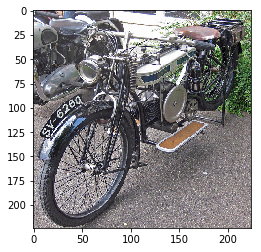

Predictions:
moped, with probability: 0.9361472725868225
motor_scooter, with probability: 0.02091301418840885
mountain_bike, with probability: 0.01377157960087061
Model_T, with probability: 0.005354117136448622
bicycle-built-for-two, with probability: 0.005351375322788954



array([[1.4088249 , 0.        , 0.        , ..., 0.        , 0.43299142,
        1.867506  ]], dtype=float32)

In [39]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
#vgg_model = VGG16(weights='imagenet')
fc2_model = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

def load_img_preprocess(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    array = image.img_to_array(img)
    x = np.expand_dims(array, axis=0)
    x = preprocess_input(x)
    return {"img": img, "array": array, "x": x}

elephant1 = load_img_preprocess('val2014/COCO_val2014_000000000073.jpg')

def show_image_predictions(img_obj):
    plt.imshow(img_obj["img"])
    plt.show()
    preds = vgg_model.predict(img_obj["x"])
    preds_dec = decode_predictions(preds, top=5)[0]
    print("Predictions:")
    for pred in preds_dec:
        print("{}, with probability: {}".format(pred[1],pred[2]))
    print("")
show_image_predictions(elephant1)

def include_features(img_obj):
    img_obj["fc2"] = fc2_model.predict(img_obj["x"])
    
include_features(elephant1)


def get_features(imgname):
    elephant1=load_img_preprocess('val2014/'+imgname)
    include_features(elephant1)
    return elephant1["fc2"]
    
get_features('COCO_val2014_000000000073.jpg')


In [76]:
######### HELPER FUNCTION

import re

#x_caption = prepare_caption(train_caption_ids, train_caps)


#string to string caption
def clean_cap(caption):
    return re.sub('[^0-9a-zA-Z]+', ' ',caption).lower().strip()

def arrstrcap2arrintcap(arrcaption):
    arr=np.zeros(50,dtype=int)
    for id,i in enumerate(arrcaption):
        try:
            arr[id]=words_indices[i]
        except KeyError:
            arr[id]=0
    return arr
    
def imgid2cap(imgid):
    cap=[]
    for i in coco_caption_val['annotations']:
        if(i['image_id']==imgid):
            cap.append(i['caption'])
    if(len(cap)==0):
        raise Exception('Caption not found!')
    return cap

def cap2imgid(cap):
    imgid=-1
    for i in coco_caption_val['annotations']:
        if(i['caption']==cap):
            imgid=i['image_id']
    if(imgid==-1):
        raise Exception('Image not found!')
    return imgid


def mapto(xtrainid):
    guessedcaption=true_caption(x_caption[xtrainid])
    #print(guessedcaption)
    img_id=-1
    for i in coco_caption_val['annotations']:
        capt=re.sub('[^0-9a-zA-Z]+', ' ',i['caption']).lower().strip()
#        print(capt)
        if(capt==guessedcaption):
            img_id=i['image_id']
            break
    for i in coco_instances_val['images']:
        if(i['id']==img_id):
            #return i['coco_url']
            show_img(i['file_name'])
    #return 'notfound!, guesdescaption= {}'.format(guessedcaption)

#translate array of int to a sentence
#input: np array of caption (encoded in [int])
#output: string
def true_caption(cap):
    caplist=[indices_words[i] for i in cap]
    strcap=""
    for i in caplist:
        if i!='<pad>' and i!='<unk>':
            strcap+=i+' '
    return strcap.strip()


def find_original_caption(image_id):
    arr=['' for i in range(5)]
    idx=0
    for i in coco_caption_val['annotations']:
        if(i['image_id']==image_id):
            arr[idx]=i['caption']
            idx+=1
    return arr

#true_caption(x_val_caption[10])

In [211]:
cap2imgid("Motorcyclist on a white and blue bike making a turn.")

116712

['A soccer player trying to score a goal.', 'A soccer player is running while the ball is in the air.', 'A soccer player jumping to hit a soccer ball.', 'a group of people playing soccer on a field', 'Soccer player wearing green and orange hitting soccer ball. ']


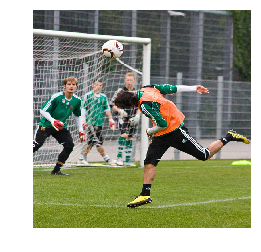

In [46]:
# YOUR CODE HERE

# choose one image_id from validation set
# use this id to get filepath of image
img_id = 5124
filepath_image = 'COCO_val2014_000000005124.jpg' 

# display original caption
original_caption = find_original_caption(img_id)
print(original_caption)
# DO NOT CHANGE BELOW CODE
#show_img(filepath_image)
img = image.load_img(os.path.join(IMAGE_DATA,filepath_image), target_size=(224,224))
plt.imshow(img)
plt.axis("off")
plt.show()

In [183]:
#coco_instances_val['images']
coco_caption_val['annotations'][0].keys()

dict_keys(['image_id', 'id', 'caption'])

In [70]:
arrstrcap2arrintcap(clean_cap(imgid2cap(391895)[0]).split())

array([   2,   10,    7,    2,   45,  500,    3,    2,   38, 1652,    3,
          2,  243,   85,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

In [65]:
clean_cap(imgid2cap(391895)[0])

'a man with a red helmet on a small moped on a dirt'

In [64]:
# function to retrieve caption, given an image query
from sklearn.neighbors import NearestNeighbors

def samearr(a,b):
    same=True
    for i,_ in enumerate(a):
        same=(same and a[i]==b[i])
    return same

def get_caption(image_filename, n=10):
    #todo convert filename to nc_img representation, eg: nc.predict(image)
    feature=get_features(image_filename)
    
    show_img(image_filename)
    img_id=-1
    for img in coco_instances_val['images']:
        if(img['file_name']==image_filename):
            img_id=img['id']
    if(img_id==-1):
        return Exception('Pic metadata (json file) not found!')
    orig_cap=imgid2cap(img_id)
    print('original caption:')
    print(orig_cap)
    
    idtrain=-1
    
    rep1024=img_model_nc.predict(feature)
    #nc_img = img_model_nc.predict(x_image)
    #nc_cap = cap_model_nc.predict([x_caption,train_noise])
    neigh = NearestNeighbors(n_neighbors=n, p=2)
    neigh.fit(nc_cap)
    nn = neigh.kneighbors(rep1024)
    #print(nn[1])
    for i in range(n):
        print("guessed cap: {}, distance={}".format(true_caption(x_caption[nn[1][0][i]]),nn[0][0][i]))
    return nn
    # YOUR CODE HERE
def search_caption(img4096, n=10):
    
    rep1024=img_model_nc.predict(img4096)
    #nc_img = img_model_nc.predict(x_image)
    #nc_cap = cap_model_nc.predict([x_caption,train_noise])
    neigh = NearestNeighbors(n_neighbors=10, p=2)
    neigh.fit(nc_img)
    nn = neigh.kneighbors(rep1024)
    for i in range(n):
        print("guessed cap: {}, distance={}".format(true_caption(x_caption[nn[1][0][i]]),nn[0][0][i]))
    return nn

In [222]:
search_caption(np.array([x_val_image[0]]),10)
print(val_caps[val_caption_ids[0]])

guessed cap: a cat sits on a white bed with sheets and pillows, distance=11.02404168266757
guessed cap: a crow approaches a cardboard pizza box on the ground and opens it, distance=11.070311042138451
guessed cap: cat sitting on a computer desk with two computers, distance=11.07671526696175
guessed cap: the shaved cat sleeps on the colorful comfortable, distance=11.083953281469435
guessed cap: a papillon lies on a blanket with a toy shaped like a piece of cake, distance=11.093608741514684
guessed cap: a cat sits on a table and watches television, distance=11.09949059886736
guessed cap: a cat is observing the dishwasher in the kitchen, distance=11.106704135024376
guessed cap: a cat is sitting in a kitchen sink, distance=11.110679796713072
guessed cap: a cat sitting on a counter top next to a stove below an oven mitt with a cat design on it, distance=11.111397346972778
guessed cap: a cat sitting behind a computer screen, distance=11.112545778389512
the black dog lies on the ground near an

In [170]:
a[0]

array([   2,   10,    7,    2,   45,  500,    3,    2,   38, 1652,    3,
          2,  243,   85,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

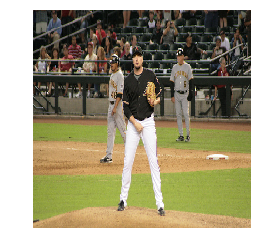

original caption:
['A baseball player scratching his balls while he stands on the field.', 'A catcher is holding a particular area while player in the background look on. ', 'A pitcher on the pitching mound gripping his crotch.', 'A group of men on a field playing baseball.', 'A pitcher on the mound adjusts his cup.']
guessed cap: soccer players are fighting for a tight possession, distance=473.42480931925724
guessed cap: an image taken from the audience of a tennis tournament, distance=473.4357385580855
guessed cap: soccer players in orange and grey uniforms on a field, distance=473.4398156950675
guessed cap: a team of baseball players are gathered closely together, distance=473.44054889344994
guessed cap: a green baseball field full of lots of players, distance=473.4455313431305
guessed cap: three tennis players are talking over the net, distance=473.45894688326285
guessed cap: a soccer team is praying on the field, distance=473.4703076156446
guessed cap: a group of children holding 

(array([[473.42480932, 473.43573856, 473.4398157 , 473.44054889,
         473.44553134, 473.45894688, 473.47030762, 473.47085358,
         473.47431132, 473.47572   ]]),
 array([[8772, 9855, 2717,  286, 9013, 7414, 1802,  611, 5209, 6900]],
       dtype=int64))

In [71]:
# DO NOT CHANGE BELOW CODE
get_caption('COCO_val2014_000000010644.jpg')

In [55]:
true_caption(x_caption[2531])

'a man throwing a frisbee in a parkland'

In [148]:
# DO NOT CHANGE BELOW CODE
a=get_caption(filepath_image)

['A man with a red helmet on a small moped on a dirt road. ', 'Man riding a motor bike on a dirt road on the countryside.', 'A man riding on the back of a motorcycle.', 'A dirt path with a young person on a motor bike rests to the foreground of a verdant area with a bridge and a background of cloud-wreathed mountains. ', 'A man in a red shirt and a red hat is on a motorcycle on a hill side.']
[[   2   10    7    2   45  500    3    2   38 1652    3    2  243   85
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [  10   46    2  528  245    3    2  243   85    3    5 1360    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   2   10   46    3    5  170    4    2  125    0    0    0    0    0
     0    0   

In [246]:
val_data['caps'][2712:2717]


[b'there is a small red pick up truck parked at the corner',
 b'people line the sidewalk and streets of a run down town',
 b'a red pickup truck parked next to a building',
 b'the old tow truck tries to lift an overturned truck thats on its side',
 b'people looking at an over turned tractor trailer on a hill']

Briefly discuss the result. Why or how it works, and why do you think it does not work at some point.

#### Answer:

=== write your answer here ===

### 8. Image Retrieval

In [78]:
# given text query, display retrieved image, similarity score, and its original caption 

def search_image(text_caption, n=10):
    caption=np.zeros(50,dtype=int)
    for id,i in enumerate(text_caption.split()):
        if(id<50):
            try:
                caption[id]=words_indices[i]
            except KeyError:
                caption[id]=0
    #return caption
    #print(true_caption(caption))
    neigh = NearestNeighbors(n_neighbors=n, p=2)
    neigh.fit(nc_img)
    #rep=cap_model_nc.predict([np.array([caption]),np.array([caption])])
    rep=cap_model_nc.predict(np.array([caption]))
    #X_fc = [nc_img_val[indices]]
    nn = neigh.kneighbors(rep)
    #nc_img = img_model_nc.predict(x_image)
    #nc_cap = cap_model_nc.predict([x_caption,train_noise])
    for id,i in enumerate(nn[1][0]):
        print(mapto(i))
        print('Distance = {}'.format(nn[0][0][id]))
    #return nn[0][0],nn[1][0]
    
    # YOUR CODE HERE
    

Consider to use the following settings for image retrieval task.

* use real caption that is available in validation set as a query.
* use part of caption as query. For instance, instead of use the whole text sentence of the
caption, you may consider to use key phrase or combination of words that is included in
corresponding caption.

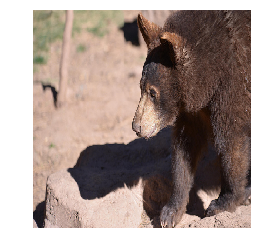

None
Distance = 8.04421110375078


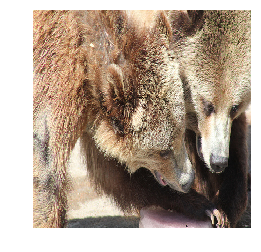

None
Distance = 8.068620524710921


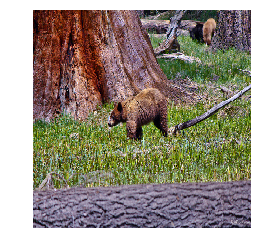

None
Distance = 8.164395019026442


In [79]:
# Example of text query 
# text = 'two giraffes standing near trees'

# YOUR QUERY-1
text1 = 'a brown bear standing next to a large tree'


# DO NOT CHANGE BELOW CODE
search_image(text1,n=3)

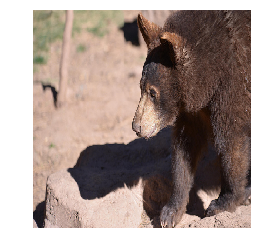

None
Distance = 8.156662534297206


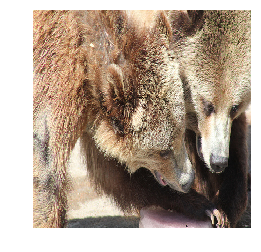

None
Distance = 8.173561015181884


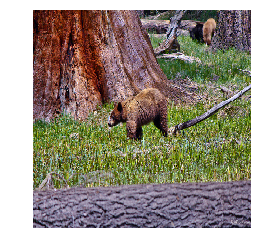

None
Distance = 8.266415507185608
None
Distance = 8.368820359669487


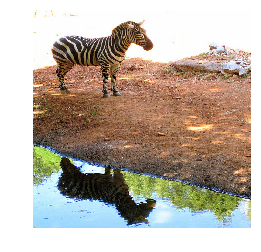

None
Distance = 8.406995147031893


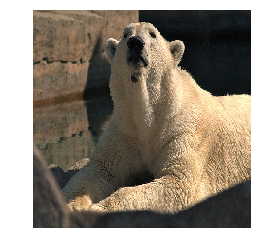

None
Distance = 8.525605498493011


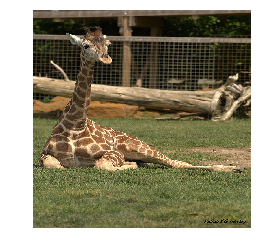

None
Distance = 8.540576264234453


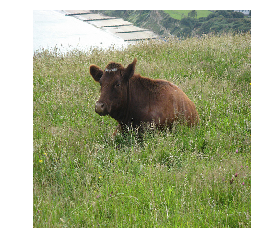

None
Distance = 8.55065143644026


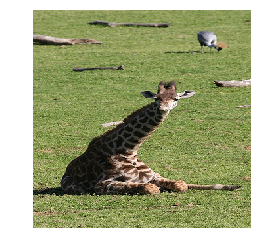

None
Distance = 8.579710439270317


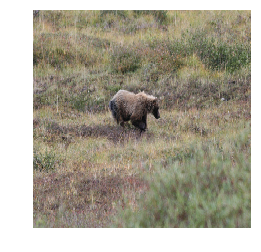

None
Distance = 8.604762594640864


In [82]:
# Example of text query 
# text = 'two giraffes standing near trees'

# YOUR QUERY-1
text1 = 'two giraffes standing near trees'

# DO NOT CHANGE BELOW CODE
search_image(text1)

In [378]:
# Example of text query 
# text = 'two giraffes standing near trees'

# YOUR QUERY-1
text1 = 'two giraffes standing near trees'

# DO NOT CHANGE BELOW CODE
search_image(text1)

two giraffes standing near trees
a mother giraffe licking her child while in nature
http://images.cocodataset.org/val2014/COCO_val2014_000000191675.jpg
a giraffe sitting on a rocky dirt and grass covered ground
http://images.cocodataset.org/val2014/COCO_val2014_000000037382.jpg
a zebra standing by its reflection in a body of water
http://images.cocodataset.org/val2014/COCO_val2014_000000491613.jpg
a giraffe peers its head above the vegetation
http://images.cocodataset.org/val2014/COCO_val2014_000000492544.jpg
a herd of zebras standing around on the dirt
http://images.cocodataset.org/val2014/COCO_val2014_000000433460.jpg
a giraffe is standing in a green field
http://images.cocodataset.org/val2014/COCO_val2014_000000263881.jpg
a horse that is eating some grass and flowers
http://images.cocodataset.org/val2014/COCO_val2014_000000215485.jpg
two giraffes out in a field walking around the grass
http://images.cocodataset.org/val2014/COCO_val2014_000000272926.jpg
two giraffes lick a branch on 

(array([6.02797075, 6.15478207, 6.17183853, 6.17640418, 6.3113919 ,
        6.34850405, 6.35893706, 6.38934159, 6.41059453, 6.459626  ]),
 array([6311, 8555, 4530, 3995, 5924, 6498, 3243, 4860, 7076, 5742],
       dtype=int64))

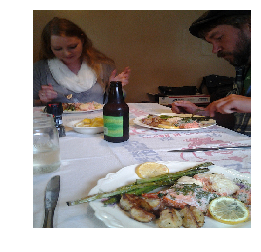

None
Distance = 10.877956924175468


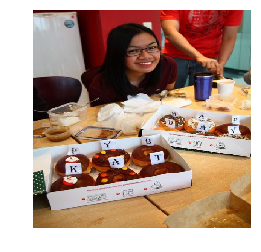

None
Distance = 10.926754216297107


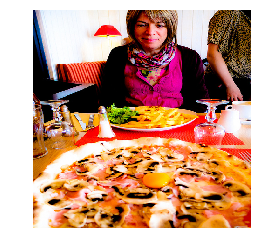

None
Distance = 10.959304267819956


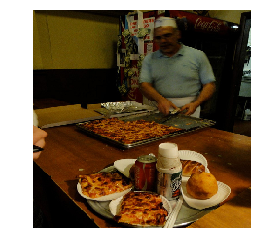

None
Distance = 10.961261031625424


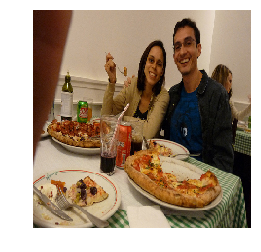

None
Distance = 10.973560990416914


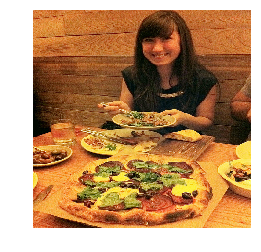

None
Distance = 11.027437022767655


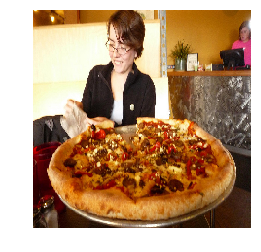

None
Distance = 11.041743447923665


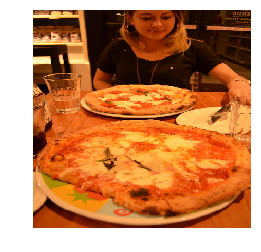

None
Distance = 11.058859220230293


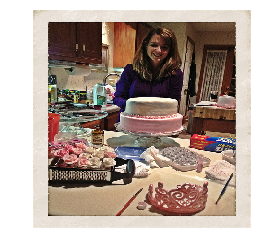

None
Distance = 11.073515529831402


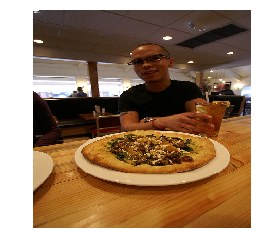

None
Distance = 11.099586637079415


In [83]:
# YOUR QUERY-2
text2 = 'an old bathroom with a new toilet installed'

# DO NOT CHANGE BELOW CODE
search_image(text2)

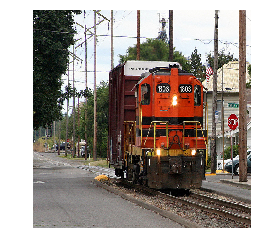

None
Distance = 6.913462563737808


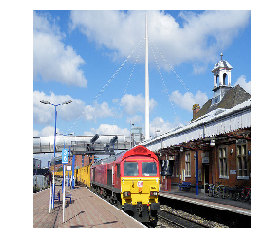

None
Distance = 6.9484096515728595


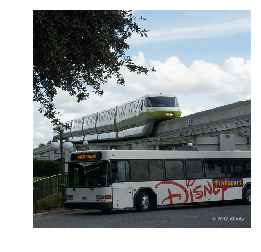

None
Distance = 7.152711628959426


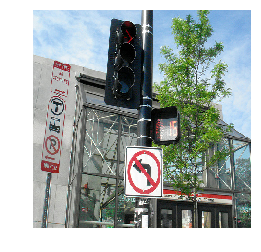

None
Distance = 7.2506711531108525


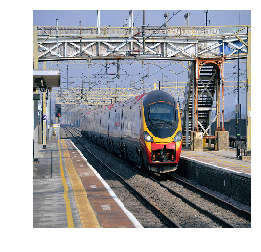

None
Distance = 7.2799211663874095


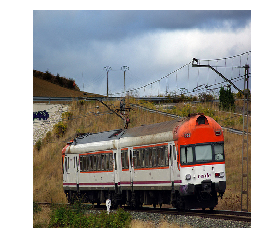

None
Distance = 7.334243322366448


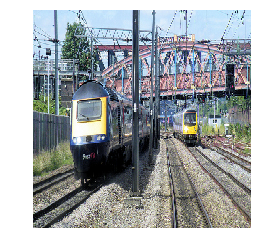

None
Distance = 7.336533321603975


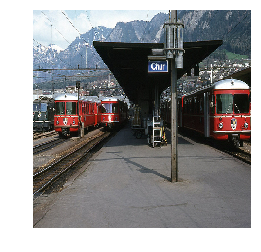

None
Distance = 7.337528605259396


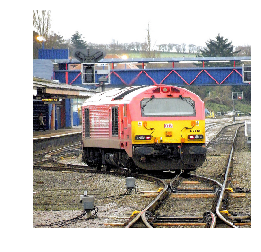

None
Distance = 7.371455055014654


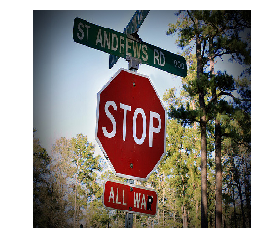

None
Distance = 7.4045962781832175


In [84]:
# YOUR QUERY-2
text2 = 'bicycle'

# DO NOT CHANGE BELOW CODE
search_image(text2)

In [391]:
# YOUR QUERY-2
text2 = 'a man with a tie on and a head band in celebration of a holiday'

# DO NOT CHANGE BELOW CODE
search_image(text2)

a couple of women standing with a boy inside of a kitchen
http://images.cocodataset.org/val2014/COCO_val2014_000000092738.jpg
four people and two of them are playing avideo game
http://images.cocodataset.org/val2014/COCO_val2014_000000033835.jpg
a woman is standing next to a man who is brushing his teeth
http://images.cocodataset.org/val2014/COCO_val2014_000000200381.jpg
a man with a tie on and a head band in celebration of a holiday
http://images.cocodataset.org/val2014/COCO_val2014_000000072238.jpg
a man standing with his eyes closed holding on to a wii remote
http://images.cocodataset.org/val2014/COCO_val2014_000000478664.jpg
two friends exchanging looks while having a meal
http://images.cocodataset.org/val2014/COCO_val2014_000000334915.jpg
a bride and groom eating a piece of their wedding cake
http://images.cocodataset.org/val2014/COCO_val2014_000000248300.jpg
a man and a woman are playing a video game using remote controls
http://images.cocodataset.org/val2014/COCO_val2014_0000004

(array([6.60706578, 6.66226594, 6.72597809, 6.83650603, 6.86228279,
        6.99545917, 7.14315199, 7.15267266, 7.22843546, 7.28081485]),
 array([2978, 8328, 3896, 8866, 8575, 1128, 2301, 4914, 7975, 7189],
       dtype=int64))

In [451]:
# YOUR QUERY-2
text2 = 'clock'

# DO NOT CHANGE BELOW CODE
search_image(text2)

a brick tower with a clock on it
http://images.cocodataset.org/val2014/COCO_val2014_000000132499.jpg
an old building with a clock on the top
http://images.cocodataset.org/val2014/COCO_val2014_000000449043.jpg
a tall clock tower with a flag on top
http://images.cocodataset.org/val2014/COCO_val2014_000000305253.jpg
we are looking at a clock tower on an old animal
http://images.cocodataset.org/val2014/COCO_val2014_000000447043.jpg
an old clock tower showing two clocks outlined in gold
http://images.cocodataset.org/val2014/COCO_val2014_000000280530.jpg
clock tower with a bronze statue on top on a sunny day
http://images.cocodataset.org/val2014/COCO_val2014_000000519491.jpg
a clock tower sits in the sun on a nice day
http://images.cocodataset.org/val2014/COCO_val2014_000000052761.jpg
a church with a tower has a clock on it
http://images.cocodataset.org/val2014/COCO_val2014_000000418297.jpg
big ben shows the time as 1:20 with a blue sky around it
notfound!
large bricked tower with clocks and

(array([6.38254696, 6.46892599, 6.59657666, 6.75068297, 6.96977682,
        6.99451163, 7.02245688, 7.0638801 , 7.24941846, 7.27354113]),
 array([1166, 2524, 6851, 1225, 2946, 5037, 7460, 7829, 3117, 3664],
       dtype=int64))

In [453]:

# YOUR QUERY-2
text2 = 'a crowd has gathered around a vender with a colorful umbrella'

# DO NOT CHANGE BELOW CODE
search_image(text2)

two women walking on a train platform
http://images.cocodataset.org/val2014/COCO_val2014_000000074256.jpg
a man and a woman with cameras at a baggage claim
http://images.cocodataset.org/val2014/COCO_val2014_000000253969.jpg
a woman leaning up against an outside wall using her cell phone
http://images.cocodataset.org/val2014/COCO_val2014_000000334941.jpg
a group of people standing and holding wii remotes
http://images.cocodataset.org/val2014/COCO_val2014_000000524601.jpg
four people sitting on a wooden bench outside of a building
http://images.cocodataset.org/val2014/COCO_val2014_000000198079.jpg
a group of young boys standing next to each other on a beach
http://images.cocodataset.org/val2014/COCO_val2014_000000531581.jpg
two people playing a video game while others watch
http://images.cocodataset.org/val2014/COCO_val2014_000000570188.jpg
a woman using her cell phone smiles wearing cat make up
http://images.cocodataset.org/val2014/COCO_val2014_000000504732.jpg
a man hugging a woman as 

(array([11.10094853, 11.78429134, 11.81884591, 11.97094778, 12.001474  ,
        12.07116521, 12.10147327, 12.10525115, 12.18337025, 12.27705329]),
 array([4546,  390, 4728, 5023, 8153, 7280, 9564, 6867, 6694, 9644],
       dtype=int64))

Briefly discuss the result. Why or how it works, and why do you think it does not work at some point.

#### Answer:

=== write your answer here ===